In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
#%matplotlib inline

In [48]:
data="D:\ML\Datasets\Mall_Customers.csv"
df=pd.read_csv(data)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
df=df.drop(['Age', 'Genre', 'CustomerID'], axis=1)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [50]:
scaler=MinMaxScaler()

df['Spending Score (1-100)']=scaler.fit_transform(df[['Spending Score (1-100)']])
df["Annual Income (k$)"]=scaler.fit_transform(df[['Annual Income (k$)']])

df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


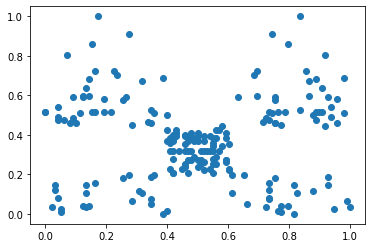

In [51]:
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"])
plt.show()

In [52]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(df[["Spending Score (1-100)", "Annual Income (k$)"]])

In [55]:
df["cluster"]=y_predicted
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,0
2,0.008197,0.051020,4
3,0.008197,0.775510,0
4,0.016393,0.397959,4


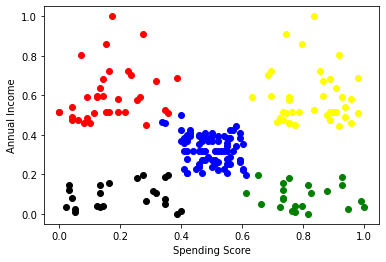

In [56]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

In [42]:
km.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ]])

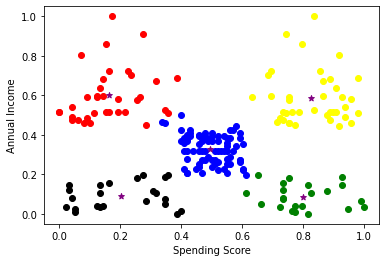

In [58]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1["Spending Score (1-100)"],df1["Annual Income (k$)"],color='green')
plt.scatter(df2["Spending Score (1-100)"],df2["Annual Income (k$)"],color='blue')
plt.scatter(df3["Spending Score (1-100)"],df3["Annual Income (k$)"],color='red')
plt.scatter(df4["Spending Score (1-100)"],df4["Annual Income (k$)"],color='yellow')
plt.scatter(df5["Spending Score (1-100)"],df5["Annual Income (k$)"],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

In [59]:
k_rng=range(1,11)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Spending Score (1-100)',"Annual Income (k$)"]])
    sse.append(km.inertia_)

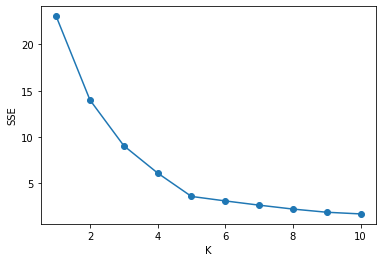

In [62]:
plt.xlabel('K')
plt.ylabel('SSE')

plt.plot(k_rng,sse)
plt.scatter(k_rng,sse)
plt.show()

In [64]:
import numpy as np
sample_test = np.array([15, 0.8])
sample_test

array([15. ,  0.8])